In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
data = pd.read_csv('data/kc_house_data.csv')

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [5]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

## Handling missing values

In [6]:
# removing unnecessary features
data = data.drop(['id', 'date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'address', 'lat', 'long'], axis=1)


In [7]:
# checking sum of null values
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
condition        0
grade            0
heat_source     32
sewer_system    14
sqft_garage      0
sqft_patio       0
yr_built         0
dtype: int64

In [8]:
# dropping rows with null values
data.dropna(subset=['heat_source', 'sewer_system'], inplace=True)
data.isnull().sum()

price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
greenbelt       0
nuisance        0
condition       0
grade           0
heat_source     0
sewer_system    0
sqft_garage     0
sqft_patio      0
yr_built        0
dtype: int64

## Handling categorical variables

In [9]:
# encoding categorical data
data = pd.get_dummies(data, columns=['waterfront', 'nuisance', 'greenbelt', 'condition', 'grade', 'heat_source', 'sewer_system'], drop_first=True)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,waterfront_YES,...,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
0,675000.0,4,1.0,1180,7140,1.0,0,40,1969,0,...,0,0,1,0,0,0,0,0,1,0
1,920000.0,5,2.5,2770,6703,1.0,0,240,1950,0,...,0,0,0,0,1,0,0,0,1,0
2,311000.0,6,2.0,2880,6156,1.0,0,0,1956,0,...,0,0,1,0,0,0,0,0,1,0
3,775000.0,3,3.0,2160,1400,2.0,200,270,2010,0,...,1,0,1,0,0,0,0,0,1,0
4,592500.0,2,2.0,1120,758,2.0,550,30,2012,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,4000,1.5,0,210,1921,0,...,0,0,0,0,1,0,0,0,1,0
30151,1313000.0,3,2.0,2020,5800,2.0,0,520,2011,0,...,0,0,1,0,0,0,0,0,1,0
30152,800000.0,3,2.0,1620,3600,1.0,240,110,1995,0,...,0,0,1,0,0,0,0,0,1,0
30153,775000.0,3,2.5,2570,2889,2.0,480,100,2006,0,...,0,0,1,0,0,0,0,0,1,0


In [10]:
# creating a correlation matrix with 
corr_with_price = data.corr()['price'].sort_values(ascending=False)
print(corr_with_price)


price                              1.000000
sqft_living                        0.608616
bathrooms                          0.480337
grade_11 Excellent                 0.317322
sqft_patio                         0.313789
bedrooms                           0.288954
grade_12 Luxury                    0.283093
sqft_garage                        0.263674
waterfront_YES                     0.235074
grade_9 Better                     0.202460
grade_13 Mansion                   0.198162
floors                             0.180589
heat_source_Gas                    0.142218
yr_built                           0.095796
sqft_lot                           0.086550
greenbelt_YES                      0.067936
heat_source_Gas/Solar              0.036678
sewer_system_PUBLIC                0.021186
nuisance_YES                       0.012186
condition_Very Good                0.008520
heat_source_Other                  0.001120
sewer_system_PUBLIC RESTRICTED    -0.001267
heat_source_Oil/Solar           

Now, let's select our first variable for simple linear regression: 'sqft_living'. Why did we choose this variable as our baseline variable? Well, according to our correlation matrix, 'sqft_living' is the variable that is most correlated with our target variable. Therefore, it is a good variable to start with and iterate off of.

<Axes: xlabel='sqft_living', ylabel='price'>

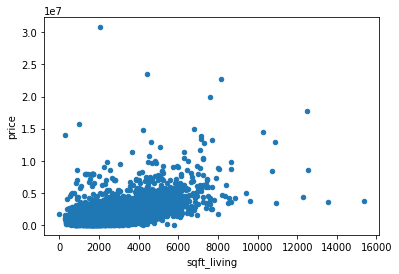

In [11]:
# Creating scatterplot of most correlated feature (sqft_living) vs price to visualize relationship
data.plot.scatter(x='sqft_living', y='price')

## Preparing simple regression baseline model

In [12]:
y = data['price']
X_baseline = data[['sqft_living']]

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:54:53   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


The R-squared value of 0.370 indicates that about 37% of the variation in 'price' can be explained by 'sqft_living'.

The coefficient of "sqft_living" is 560.0050, which means that for every one-unit increase in "sqft_living", the predicted value of "price" increases by approximately $560.

The constant coefficient, also known as the intercept, is -7.443e+04, which represents the predicted value of "price" when "sqft_living" is zero.

The F-statistic of 1.773e+04 and the associated p-value of 0.00 indicate that the overall model is significant and the independent variable "sqft_living" is a significant predictor of "price". The p-values associated with the t-statistics indicate that both the intercept and the coefficient of "sqft_living" are significant at the 0.05 level.

The Durbin-Watson statistic of 1.862 suggests that there may be some positive autocorrelation in the residuals of the model.

The report also provides some additional notes, including the assumption of non-robust covariance and the presence of strong multicollinearity or other numerical problems based on the large condition number.

## Basline Model Visualization

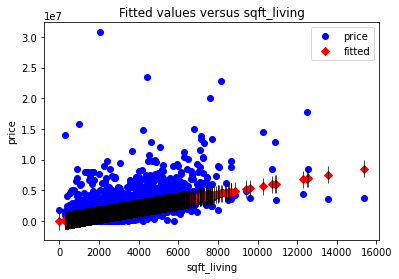

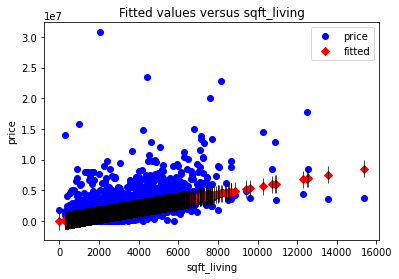

In [13]:
# Plotting actual vs predicted variables
sm.graphics.plot_fit(baseline_results, "sqft_living")

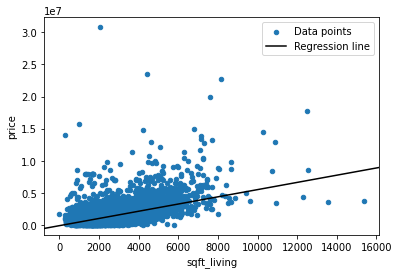

In [14]:
# Plotting regression line

fig, ax = plt.subplots()
data.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend()
plt.show()


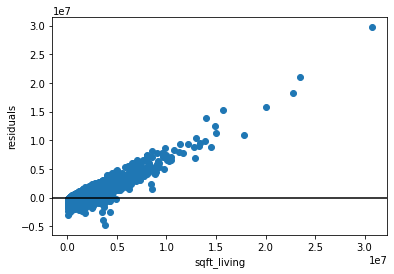

In [15]:
# Plotting residuals

fig, ax = plt.subplots()
ax.scatter(data["price"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

## Adding a numerical independent variable to multiple linear regression model

In [16]:
X_second = data[['sqft_living', 'bathrooms']]
X_second

,sqft_living,bathrooms
0,1180,1.0
1,2770,2.5
2,2880,2.0
3,2160,3.0
4,1120,2.0
...,...,...
30150,1910,2.0
30151,2020,2.0
30152,1620,2.0
30153,2570,2.5


In [17]:
second_model = sm.OLS(y, sm.add_constant(X_second))
second_results = second_model.fit()

print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     8867.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:54:56   Log-Likelihood:            -4.4846e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30108   BIC:                         8.970e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.749e+04   1.16e+04     -8.429      

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Compared to the first iteration, the R-squared value and the Adjusted R-squared value are identical at 0.371, indicating that the inclusion of the "bathrooms" variable did not substantially improve the model's ability to explain the variation in the dependent variable.

The coefficient of "sqft_living" is now 542.2820, slightly lower than the previous iteration, which means that for every one-unit increase in "sqft_living", the predicted value of "price" increases by $542. 

The coefficient of "bathrooms" is 2.587e+04, indicating that for every additional bathroom, the predicted value of "price" increases by $25,870.

The intercept coefficient is now -9.749e+04, indicating that the predicted value of "price" when both "sqft_living" and "bathrooms" are zero is now $97,490 lower than the first iteration.

The F-statistic of 8867 and the associated p-value of 0.00 indicate that the overall model is significant, and the independent variables "sqft_living" and "bathrooms" are significant predictors of "price" at the 0.05 level.

The Durbin-Watson statistic of 1.862 suggests that there may be some positive autocorrelation in the residuals of the model, which is the same as the first iteration.

The condition number is 7.03e+03, indicating a potential issue with multicollinearity.

In conclusion, the addition of the "bathrooms" variable has slightly improved the model's ability to explain the variation in the dependent variable, but the improvement is not substantial. The inclusion of another variable has slightly increased the potential for multicollinearity in the model.

## 2-variable multiple linear regression visualization

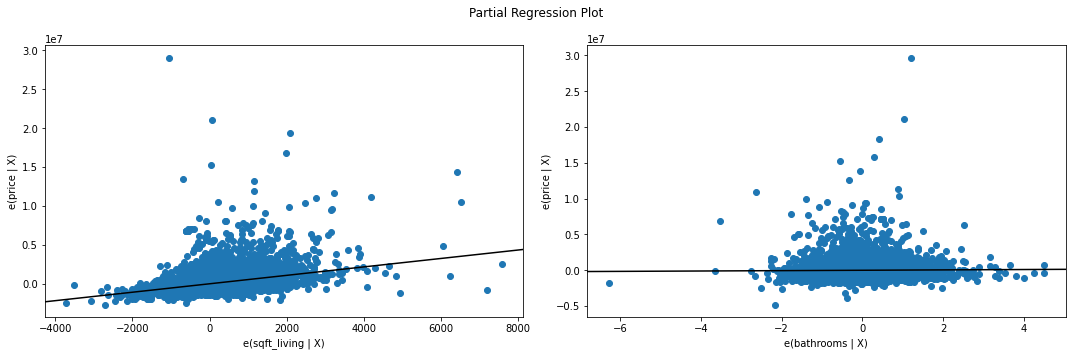

In [18]:
# Creating partial regression plots for 'sqft_living' and 'bathrooms'

fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(second_results, exog_idx=["sqft_living", "bathrooms"], fig=fig)
plt.tight_layout()
plt.show()

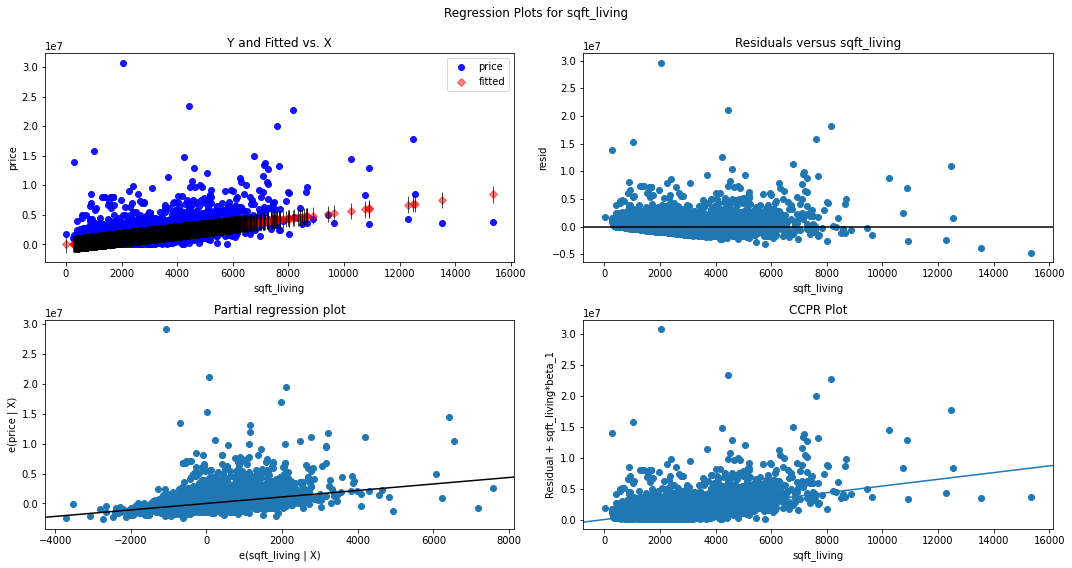

In [19]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(second_results, "sqft_living", fig=fig)
plt.show()

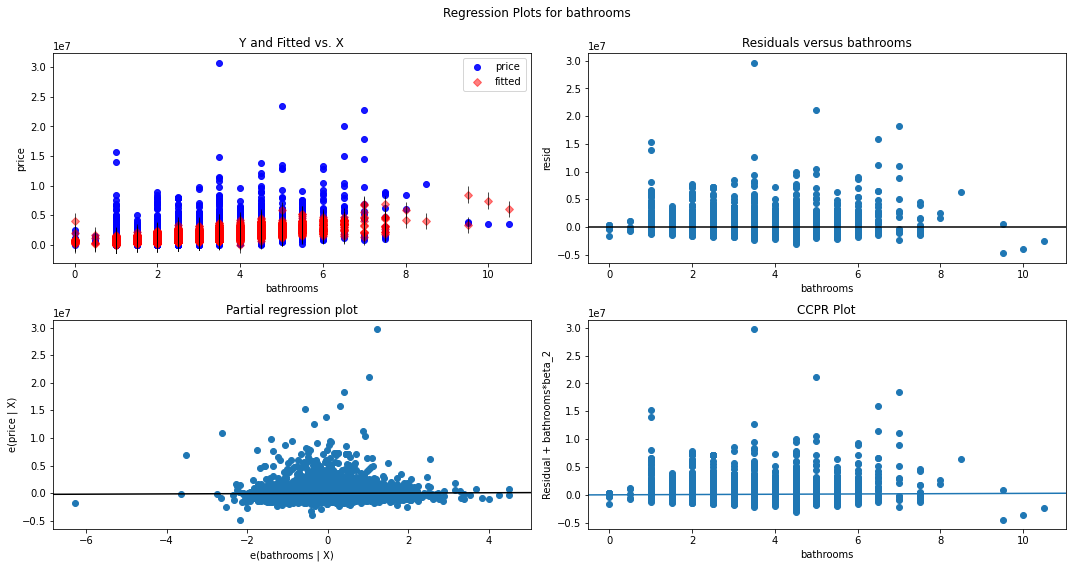

In [20]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(second_results, "bathrooms", fig=fig)
plt.show()

The partial regression plot for sqft_living shows the relationship between sqft_living and price, controlling for the effect of bathrooms. The positive slope of the line indicates that as the value of sqft_living increases, the value of price tends to increase as well, even when controlling for the effect of bathrooms. This suggests that sqft_living is a significant predictor of price and has a positive effect on the target variable.

On the other hand, the partial regression plot for bathrooms shows the relationship between bathrooms and price, controlling for the effect of sqft_living. The horizontal line at 0.0 on the y-axis indicates that there is no significant relationship between bathrooms and price, when controlling for the effect of sqft_living. This suggests that bathrooms may not be a strong predictor of price when factoring in the significance of sqft_living, but this could change as more variables are added.

## Multiple Linear Regression with Three Features

It's time to throw a categorical variable into our model. Let's call back the corr_matrix that we created earlier:

In [21]:
corr_with_price

price                              1.000000
sqft_living                        0.608616
bathrooms                          0.480337
grade_11 Excellent                 0.317322
sqft_patio                         0.313789
bedrooms                           0.288954
grade_12 Luxury                    0.283093
sqft_garage                        0.263674
waterfront_YES                     0.235074
grade_9 Better                     0.202460
grade_13 Mansion                   0.198162
floors                             0.180589
heat_source_Gas                    0.142218
yr_built                           0.095796
sqft_lot                           0.086550
greenbelt_YES                      0.067936
heat_source_Gas/Solar              0.036678
sewer_system_PUBLIC                0.021186
nuisance_YES                       0.012186
condition_Very Good                0.008520
heat_source_Other                  0.001120
sewer_system_PUBLIC RESTRICTED    -0.001267
heat_source_Oil/Solar           

From our list, it looks like the categorical variabel with the strongest positive correaltion to 'price' is 'grade_11 Excellent' and the categorical variable with the strongest negative correlation to 'price' is 'grade_7 Average'. Let's add 'grade_7 Average' to our model just to spice things up and evaluate how its addition to the model affects variation in price. 

In [22]:
x_third_model = data[['sqft_living', 'bathrooms', 'grade_7 Average']]
x_third_model

,sqft_living,bathrooms,grade_7 Average
0,1180,1.0,1
1,2770,2.5,1
2,2880,2.0,1
3,2160,3.0,0
4,1120,2.0,1
...,...,...,...
30150,1910,2.0,0
30151,2020,2.0,1
30152,1620,2.0,1
30153,2570,2.5,0


In [23]:
third_model = sm.OLS(y, sm.add_constant(x_third_model))
third_results = third_model.fit()

print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     6027.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:55:02   Log-Likelihood:            -4.4835e+05
No. Observations:               30111   AIC:                         8.967e+05
Df Residuals:                   30107   BIC:                         8.967e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2667.3619   1.34e+04     

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


This is the summary of the third iteration of the model, which includes three independent variables: "sqft_living," "bathrooms," and "grade_7 Average."

Compared to the second iteration, the R-squared value and the Adjusted R-squared value have increased to 0.375, indicating that the addition of the "grade_7 Average" variable has improved the model's ability to explain the variation in the dependent variable.

The coefficient of "sqft_living" is now 526.2930, slightly lower than the previous iteration, which means that for every one-unit increase in "sqft_living", the predicted value of "price" increases by $ 526. 

The coefficient of "bathrooms" is now 1.923e+04, indicating that for every additional bathroom, the predicted value of "price" increases by $ 19,230. The coefficient of "grade_7 Average" is -1.31e+05, indicating that the predicted value of "price" is 131,000 lower for houses with "grade_7 Average" compared to those with "grade_7 Above Average."

The intercept coefficient is now 2667.3619, indicating that the predicted value of "price" when all three independent variables are zero is $2667. This value is significantly different from the previous two iterations, where the intercept was negative.

The F-statistic of 6027 and the associated p-value of 0.00 indicate that the overall model is significant, and the independent variables "sqft_living," "bathrooms," and "grade_7 Average" are significant predictors of "price" at the 0.05 level.

The Durbin-Watson statistic of 1.862 suggests that there may be some positive autocorrelation in the residuals of the model, which is the same as the previous two iterations.

The condition number is 8.42e+03, indicating a potential issue with multicollinearity, which is also the same as the previous iteration.

In conclusion, the addition of the "grade_7 Average" variable has improved the model's ability to explain the variation in the dependent variable, and the model's intercept has shifted to a positive value. The potential issue of multicollinearity in the model remains.

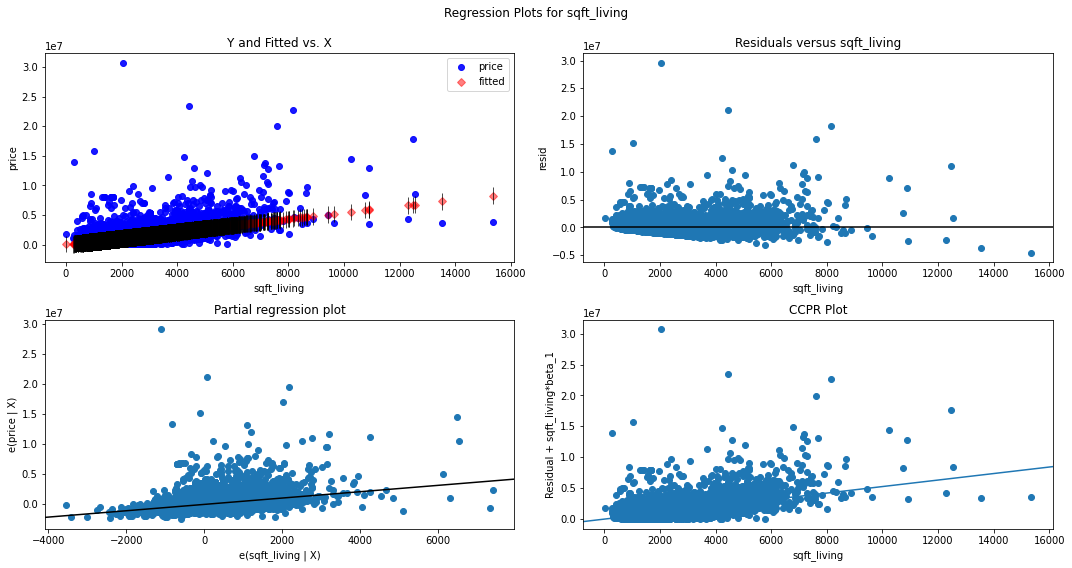

In [24]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(third_results, "sqft_living", fig=fig)
plt.show()

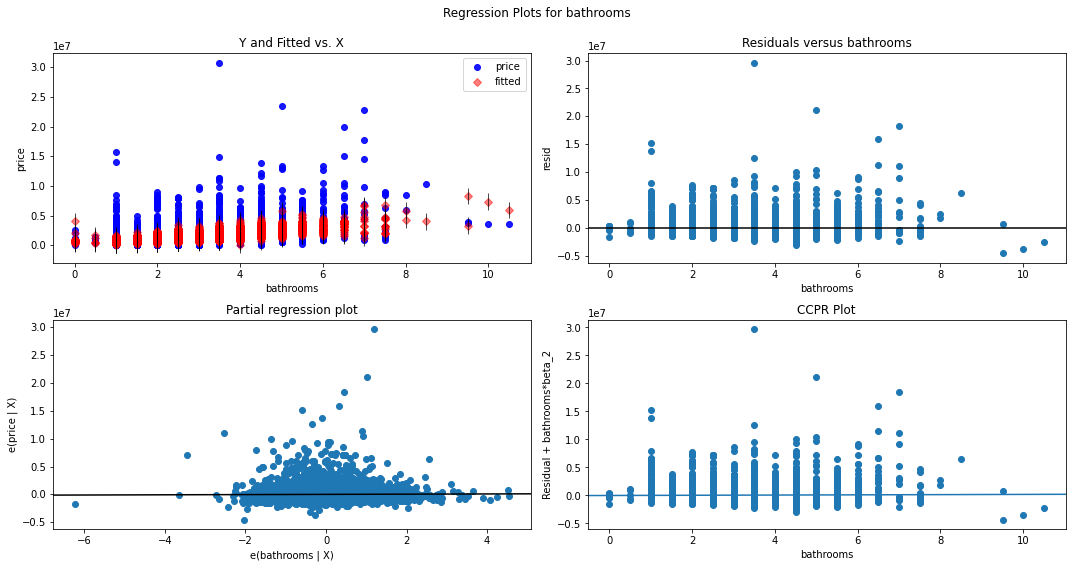

In [25]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(third_results, "bathrooms", fig=fig)
plt.show()

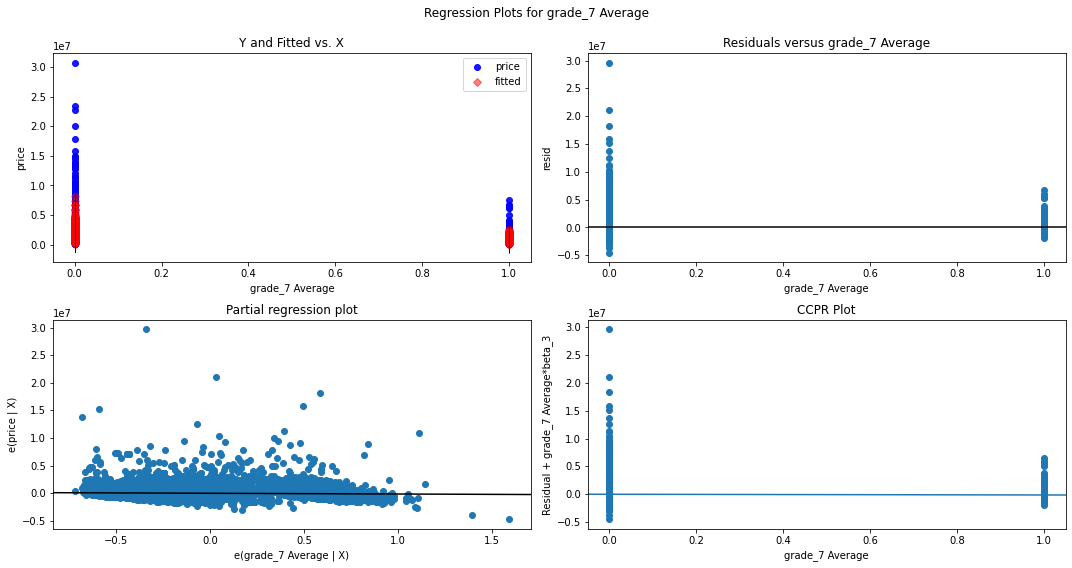

In [26]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(third_results, "grade_7 Average", fig=fig)
plt.show()

## Multiple linear regression with 3+ variables

Let's add another categorical, this time the categorical varibale most positively correlated with 'price': 'grade_11 Excellent'.

In [27]:
x_fourth_model = data[['sqft_living', 'bathrooms', 'grade_7 Average', 'grade_11 Excellent']]
x_fourth_model

,sqft_living,bathrooms,grade_7 Average,grade_11 Excellent
0,1180,1.0,1,0
1,2770,2.5,1,0
2,2880,2.0,1,0
3,2160,3.0,0,0
4,1120,2.0,1,0
...,...,...,...,...
30150,1910,2.0,0,0
30151,2020,2.0,1,0
30152,1620,2.0,1,0
30153,2570,2.5,0,0


In [28]:
fourth_model = sm.OLS(y, sm.add_constant(x_fourth_model))
fourth_results = fourth_model.fit()

print(fourth_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     4918.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:55:10   Log-Likelihood:            -4.4786e+05
No. Observations:               30111   AIC:                         8.957e+05
Df Residuals:                   30106   BIC:                         8.958e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6.854e+04   1.33

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Compared to the third iteration, the fourth iteration includes an additional independent variable, "grade_11 Excellent," which has significantly increased the R-squared value and the Adjusted R-squared value to 0.395. This indicates that the model with four variables explains more of the variation in the dependent variable than the model with three variables.

The coefficient of "sqft_living" is now 480.7534, slightly lower than the previous iteration, which means that for every one-unit increase in "sqft_living", the predicted value of "price" increases by 480 USD. 

The coefficient of "bathrooms" is now 2.559e+04, indicating that for every additional bathroom, the predicted value of "price" increases by 25,590 USD. The coefficient of "grade_7 Average" is -1.31e+05, indicating that the predicted value of "price" 131,000 USD lower for houses with "grade_7 Average" compared to those with above average grades. The coefficient of "grade_11 Excellent" is 1.152e+06, indicating that the predicted value of "price" is 1,152,000 USD higher for houses with "grade_11 Excellent" compared to those with above average grades.

The intercept coefficient is now 6.854e+04, indicating that the predicted value of "price" when all four independent variables are zero is 68,540 USD.

The F-statistic of 4918 and the associated p-value of 0.00 indicate that the overall model is significant, and the independent variables "sqft_living," "bathrooms," "grade_7 Average," and "grade_11 Excellent" are significant predictors of "price" at the 0.05 level.

The Durbin-Watson statistic of 1.858 suggests that there may be some positive autocorrelation in the residuals of the model, which is the same as the previous iteration.

The condition number is 2.12e+04, indicating a potential issue with multicollinearity, which is also the same as the previous iteration.

In conclusion, the addition of the "grade_11 Excellent" variable has improved the model's ability to explain the variation in the dependent variable, and the model's intercept has shifted to a positive value. The potential issue of multicollinearity in the model remains.

In [29]:
y_log = np.log(y)
y_log.name = "price_log"
y_log

0        13.422468
1        13.732129
2        12.647548
3        13.560618
4        13.292106
           ...    
30150    14.256986
30151    14.087825
30152    13.592367
30153    13.560618
30154    13.122363
Name: price_log, Length: 30111, dtype: float64

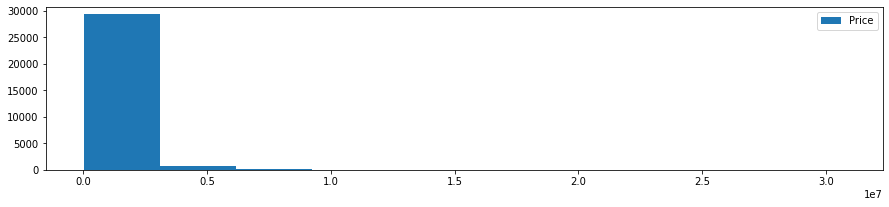

In [30]:
# Plotting distributions of target vs. log-transformed target values
fig, ax = plt.subplots(figsize=(15,3))
ax.hist(y, label="Price")
ax.legend();


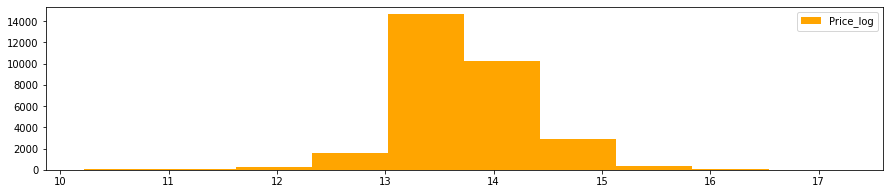

In [31]:

fig, ax = plt.subplots(figsize=(15,3))
ax.hist(y_log, color="orange", label="Price_log")
ax.legend();

In [32]:
y_log_model = sm.OLS(y_log, sm.add_constant(x_fourth_model))
y_log_results = y_log_model.fit()

print(y_log_results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     5067.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:55:11   Log-Likelihood:                -18679.
No. Observations:               30111   AIC:                         3.737e+04
Df Residuals:                   30106   BIC:                         3.741e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 13.0070      0

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Compared to the previous iterations, the fifth model iteration uses a log-transformed dependent variable and includes the same independent variables as the fourth iteration: sqft_living, bathrooms, grade_7 Average, and grade_11 Excellent. The R-squared value has increased to 0.402, indicating that the model explains a greater proportion of the variance in the log-transformed price values. The coefficients for the independent variables have also changed, but their interpretations remain the same as in the previous iterations. The condition number is still large, which may suggest the presence of multicollinearity or other numerical issues. Overall, the fifth iteration appears to have improved the model fit and distribution of the dependent variable, but the issue of multicollinearity may need to be further addressed.

# Could other predictors stand to be log-transformed? Plot them below and then plot their log-transformed versions and see which one look most normally distributed.

In [37]:
x_sixth_model = data[['sqft_living', 'bathrooms', 'grade_7 Average', 'grade_11 Excellent', 'sqft_patio', 'bedrooms', 'sqft_garage', 'waterfront_YES', 'greenbelt_YES', 'floors', 'yr_built']]
x_sixth_model

,sqft_living,bathrooms,grade_7 Average,grade_11 Excellent,sqft_patio,bedrooms,sqft_garage,waterfront_YES,greenbelt_YES,floors,yr_built
0,1180,1.0,1,0,40,4,0,0,0,1.0,1969
1,2770,2.5,1,0,240,5,0,0,0,1.0,1950
2,2880,2.0,1,0,0,6,0,0,0,1.0,1956
3,2160,3.0,0,0,270,3,200,0,0,2.0,2010
4,1120,2.0,1,0,30,2,550,0,0,2.0,2012
...,...,...,...,...,...,...,...,...,...,...,...
30150,1910,2.0,0,0,210,5,0,0,0,1.5,1921
30151,2020,2.0,1,0,520,3,0,0,0,2.0,2011
30152,1620,2.0,1,0,110,3,240,0,0,1.0,1995
30153,2570,2.5,0,0,100,3,480,0,0,2.0,2006


In [38]:
sixth_model = sm.OLS(y_log, sm.add_constant(x_sixth_model))
sixth_model_results = sixth_model.fit()

print(sixth_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     2076.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:57:40   Log-Likelihood:                -17928.
No. Observations:               30111   AIC:                         3.588e+04
Df Residuals:                   30099   BIC:                         3.598e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 18.8768      0

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


The model seems to have improved with an increased R-squared value of 0.431 compared to the previous models. The coefficients of all the features are significant at the 0.05 level except for 'sqft_garage' which has a p-value of 0.124, indicating that it may not be a significant predictor of the target variable. The presence of multicollinearity cannot be ruled out since some of the predictors may be correlated with each other. Also, the condition number is quite large, indicating a possibility of strong multicollinearity or other numerical problems.

To address multicollinearity, we could consider dropping some of the features that have high correlation with other features. We can also use techniques such as principal component analysis (PCA) or ridge regression to reduce the effects of multicollinearity on the model.

In [39]:
data['price_log'] = np.log(data['price'])

In [40]:
data = data.drop('price', axis=1)

addressing multicollinearity

In [45]:
# drop target variable and compute new correlation matrix
corr_matrix = data.drop('price_log', axis=1).corr().abs() 
num_features = len(corr_matrix.columns) # number of features

# stack the matrix to get pairs of features and their correlation coefficients
corr_pairs = corr_matrix.unstack().sort_values(ascending=False).reset_index() 
corr_pairs.rename(columns={0: 'correlation'}, inplace=True)

# filter out pairs where the two features are the same or where one of them is the target variable
corr_pairs = corr_pairs[corr_pairs['level_0'] != corr_pairs['level_1']]
corr_pairs = corr_pairs[corr_pairs['level_0'] != 'price_log']
corr_pairs = corr_pairs[corr_pairs['level_1'] != 'price_log']

# print the top 5 pairs of features and their correlation coefficients
print(corr_pairs.head(5))


        level_0      level_1  correlation
35    bathrooms  sqft_living     0.772226
36  sqft_living    bathrooms     0.772226
37     bedrooms  sqft_living     0.637048
38  sqft_living     bedrooms     0.637048
39     bedrooms    bathrooms     0.588035


In [46]:
# creating a correlation matrix with 
corr_with_price_log = data.corr()['price_log'].sort_values(ascending=False)
print(corr_with_price_log)


price_log                          1.000000
sqft_living                        0.621995
bathrooms                          0.516579
bedrooms                           0.345886
sqft_patio                         0.310324
sqft_garage                        0.284627
grade_9 Better                     0.283096
grade_11 Excellent                 0.243749
floors                             0.234263
heat_source_Gas                    0.183354
grade_12 Luxury                    0.167870
waterfront_YES                     0.138596
yr_built                           0.120331
greenbelt_YES                      0.097182
grade_13 Mansion                   0.086235
sqft_lot                           0.084701
grade_8 Good                       0.068209
heat_source_Gas/Solar              0.036581
sewer_system_PUBLIC                0.032938
condition_Very Good                0.022461
sewer_system_PUBLIC RESTRICTED     0.000534
heat_source_Other                 -0.000429
heat_source_Oil/Solar           

In [52]:
# removing 'bedrooms'
x_seventh_model = data[['sqft_living', 'bathrooms', 'grade_6 Low Average', 'grade_5 Fair', 'heat_source_Oil', 'grade_7 Average', 'grade_9 Better', 'condition_Poor', 'condition_Fair', 'grade_11 Excellent', 'sqft_patio', 'sqft_garage', 'waterfront_YES', 'greenbelt_YES', 'floors', 'yr_built']]

seventh_model = sm.OLS(y_log, sm.add_constant(x_seventh_model))
seventh_model_results = seventh_model.fit()

print(seventh_model_results.summary())


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     1663.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:36:10   Log-Likelihood:                -16892.
No. Observations:               30111   AIC:                         3.382e+04
Df Residuals:                   30094   BIC:                         3.396e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  21.0598    

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
